In [1]:
import torch
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
torch.set_printoptions(edgeitems=2, linewidth=75)
import math
import os
import time
from datetime import datetime
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(edgeitems=2, linewidth=75)
import math
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
df = pd.read_csv('mta_1706.csv',error_bad_lines=False )

In [3]:
df.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = True) 
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,23:58:02
2,2017-06-01 00:03:49,0,Bx10,E 206 ST/BAINBRIDGE AV,40.875008,-73.880142,RIVERDALE 263 ST,40.912376,-73.902534,NYCT_4223,40.886010,-73.912647,HENRY HUDSON PKY E/W 235 ST,at stop,5.0,2017-06-01 00:03:56,24:00:53
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
4,2017-06-01 00:03:22,1,Bx1,RIVERDALE AV/W 231 ST,40.881187,-73.909340,MOTT HAVEN 136 ST via CONCOURSE,40.809654,-73.928360,NYCT_4710,40.868134,-73.893032,GRAND CONCOURSE/E 196 ST,at stop,11.0,2017-06-01 00:03:56,23:59:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12
5804365,2017-06-30 23:53:21,1,M5,BROADWAY/W 178 ST,40.848522,-73.937706,31 ST 6 AV,40.747791,-73.988831,NYCT_6388,40.820420,-73.955842,W 135 ST/RIVERSIDE DR,approaching,120.0,2017-06-30 23:54:27,23:44:16
5804366,2017-06-30 23:53:34,0,M4,W 32 ST/7 AV,40.749405,-73.991020,WASH HTS CABRINI BLV via MADSON via BWAY,40.859013,-73.934250,NYCT_6392,40.797009,-73.948954,CENTRAL PK N/5 AV,at stop,22.0,2017-06-30 23:53:42,23:50:00


In [4]:
number = df.ArrivalProximityText.unique().size
print("number_of_statuses : "+ str(number))

number_of_statuses : 209


In [5]:
df = df[df["ArrivalProximityText"].str.contains("at stop") == False]
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
1,2017-06-01 00:03:43,1,S61,ST GEORGE FERRY/S61 & S91,40.643169,-74.073494,S I MALL YUKON AV,40.575935,-74.167686,NYCT_8263,40.590802,-74.158340,MERRYMOUNT ST/TRAVIS AV,approaching,62.0,2017-06-01 00:03:56,23:58:02
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35
6,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,40.648801,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804362,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,40.767813,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12
5804365,2017-06-30 23:53:21,1,M5,BROADWAY/W 178 ST,40.848522,-73.937706,31 ST 6 AV,40.747791,-73.988831,NYCT_6388,40.820420,-73.955842,W 135 ST/RIVERSIDE DR,approaching,120.0,2017-06-30 23:54:27,23:44:16


In [6]:
number = df.ArrivalProximityText.unique().size
print("number_of_statuses : "+ str(number))

number_of_statuses : 208


In [7]:
number = df.PublishedLineName.unique().size
print("number_of_lines : "+ str(number))

number_of_lines : 236


In [8]:
df=df[df['DirectionRef']==0]
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35
6,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,40.648801,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47
7,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804361,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,40.675349,-73.927717,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18
5804362,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,40.767813,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12


In [9]:
pd.options.mode.chained_assignment = None  

In [10]:
df.loc[:, 'bus_stop'] = df['NextStopPointName'].factorize()[0] + 1
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,bus_stop
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14,1
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35,3
6,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,40.648801,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4
7,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804361,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,40.675349,-73.927717,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18,1205
5804362,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,40.767813,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00,985
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34,3622
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12,479


In [11]:
df[['date','expectedarrival']] = df.ExpectedArrivalTime.str.split(expand=True)
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,VehicleLocation.Latitude,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,bus_stop,date,expectedarrival
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,40.635170,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,2017-06-01,00:03:59
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,40.668002,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2017-06-01,00:04:03
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,40.792897,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,2017-06-01,00:03:56
6,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,40.648801,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,2017-06-01,00:04:13
7,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,40.632258,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,2017-06-01,00:03:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804361,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,40.675349,-73.927717,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18,1205,2017-06-30,23:53:49
5804362,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,40.767813,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00,985,2017-06-30,23:53:39
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,40.840354,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34,3622,2017-06-30,23:54:13
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,40.699765,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12,479,2017-06-30,23:53:52


In [12]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.day_name()
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,VehicleLocation.Longitude,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,bus_stop,date,expectedarrival,day_of_week
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,-73.960803,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,2017-06-01,00:03:59,Thursday
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,-73.729348,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2017-06-01,00:04:03,Thursday
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,-73.950023,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,2017-06-01,00:03:56,Thursday
6,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,-73.882682,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,2017-06-01,00:04:13,Thursday
7,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,-73.918318,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,2017-06-01,00:03:56,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804361,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,-73.927717,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18,1205,2017-06-30,23:53:49,Friday
5804362,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,-73.981383,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00,985,2017-06-30,23:53:39,Friday
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,-73.922210,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34,3622,2017-06-30,23:54:13,Friday
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,-73.911974,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12,479,2017-06-30,23:53:52,Friday


In [13]:
day_type_mapping = {
    'Monday': 'Workday',
    'Tuesday': 'Workday',
    'Wednesday': 'Workday',
    'Thursday': 'Workday',
    'Friday': 'Workday',
    'Saturday': 'Weekend',
    'Sunday': 'Weekend'
}

df['day_type'] = df['day_of_week'].map(day_type_mapping)
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,bus_stop,date,expectedarrival,day_of_week,day_type
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,2017-06-01,00:03:59,Thursday,Workday
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2017-06-01,00:04:03,Thursday,Workday
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,2017-06-01,00:03:56,Thursday,Workday
6,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,2017-06-01,00:04:13,Thursday,Workday
7,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,2017-06-01,00:03:56,Thursday,Workday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804361,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18,1205,2017-06-30,23:53:49,Friday,Workday
5804362,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00,985,2017-06-30,23:53:39,Friday,Workday
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34,3622,2017-06-30,23:54:13,Friday,Workday
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12,479,2017-06-30,23:53:52,Friday,Workday


In [14]:
df['day_type']=df.day_type.factorize()[0]+1
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,NextStopPointName,ArrivalProximityText,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,bus_stop,date,expectedarrival,day_of_week,day_type
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,FOSTER AV/E 18 ST,approaching,76.0,2017-06-01 00:03:59,24:06:14,1,2017-06-01,00:03:59,Thursday,1
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,HOOK CREEK BL/SUNRISE HY,< 1 stop away,267.0,2017-06-01 00:04:03,24:03:00,2,2017-06-01,00:04:03,Thursday,1
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,MADISON AV/E 106 ST,approaching,73.0,2017-06-01 00:03:56,24:02:35,3,2017-06-01,00:03:56,Thursday,1
6,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,PENNSYLVANIA AV/DELMAR LOOP N,< 1 stop away,196.0,2017-06-01 00:04:13,23:58:47,4,2017-06-01,00:04:13,Thursday,1
7,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,FLATLANDS AV/RALPH AV,approaching,35.0,2017-06-01 00:03:56,24:00:00,5,2017-06-01,00:03:56,Thursday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804361,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,ROCHESTER AV/BERGEN ST,approaching,85.0,2017-06-30 23:53:49,23:30:18,1205,2017-06-30,23:53:49,Friday,1
5804362,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,Columbus Circle (does not stop),approaching,44.0,2017-06-30 23:53:39,23:47:00,985,2017-06-30,23:53:39,Friday,1
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,W 170 ST/EDWARD L GRANT HY,approaching,123.0,2017-06-30 23:54:13,24:09:34,3622,2017-06-30,23:54:13,Friday,1
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,GATES AV/WYCKOFF AV,approaching,47.0,2017-06-30 23:53:52,23:44:12,479,2017-06-30,23:53:52,Friday,1


In [15]:
number = df.day_type.unique().size
print("number : "+ str(number))

number : 2


In [16]:
number = df.DestinationName.unique().size
print("number_of_destination : "+ str(number))

number_of_destination : 312


In [17]:
number = df.OriginName.unique().size
print("number_of_origins : "+ str(number))

number_of_origins : 310


In [18]:
number = df.bus_stop.unique().size
print("number_of_stops : "+ str(number))

number_of_stops : 6229


In [19]:
number = df.PublishedLineName.unique().size
print("number_of_lines : "+ str(number))

number_of_lines : 232


In [20]:
df['line']=df.PublishedLineName.factorize()[0]+1

In [21]:
number = df.VehicleRef.unique().size
print("number_of_Vehicle_references : "+ str(number))

number_of_Vehicle_references : 4468


In [22]:
df['Vehicle_type']=df.VehicleRef.factorize()[0]+1
df

,RecordedAtTime,DirectionRef,PublishedLineName,OriginName,OriginLat,OriginLong,DestinationName,DestinationLat,DestinationLong,VehicleRef,...,DistanceFromStop,ExpectedArrivalTime,ScheduledArrivalTime,bus_stop,date,expectedarrival,day_of_week,day_type,line,Vehicle_type
0,2017-06-01 00:03:34,0,B8,4 AV/95 ST,40.616104,-74.031143,BROWNSVILLE ROCKAWAY AV,40.656048,-73.907379,NYCT_430,...,76.0,2017-06-01 00:03:59,24:06:14,1,2017-06-01,00:03:59,Thursday,1,1,1
3,2017-06-01 00:03:31,0,Q5,TEARDROP/LAYOVER,40.701748,-73.802399,ROSEDALE LIRR STA via MERRICK,40.666012,-73.735939,NYCT_8422,...,267.0,2017-06-01 00:04:03,24:03:00,2,2017-06-01,00:04:03,Thursday,1,2,2
5,2017-06-01 00:03:40,0,M1,4 AV/E 10 ST,40.731342,-73.990288,HARLEM 147 ST via MADISON,40.821110,-73.935898,NYCT_3831,...,73.0,2017-06-01 00:03:56,24:02:35,3,2017-06-01,00:03:56,Thursday,1,3,3
6,2017-06-01 00:03:29,0,B83,GATEWAY CTR TERM/GATEWAY DR,40.652649,-73.877029,BWAY JCT VN SNDRN AV,40.678139,-73.903572,NYCT_4841,...,196.0,2017-06-01 00:04:13,23:58:47,4,2017-06-01,00:04:13,Thursday,1,4,4
7,2017-06-01 00:03:27,0,B82,STILLWELL TERMINAL BUS LOOP,40.577080,-73.981293,SPRING CRK TWRS SEAVIEW AV via KINGS HWY,40.642990,-73.878326,NYCT_6592,...,35.0,2017-06-01 00:03:56,24:00:00,5,2017-06-01,00:03:56,Thursday,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804361,2017-06-30 23:53:24,0,B65,SMITH ST/FULTON ST,40.691208,-73.987373,CROWN HTS RALPH AV,40.670197,-73.922546,NYCT_4931,...,85.0,2017-06-30 23:53:49,23:30:18,1205,2017-06-30,23:53:49,Friday,1,40,3296
5804362,2017-06-30 23:53:12,0,M104,W 41 ST/8 AV,40.756550,-73.990120,W HARLEM 129 ST via BWAY,40.814907,-73.955048,NYCT_6705,...,44.0,2017-06-30 23:53:39,23:47:00,985,2017-06-30,23:53:39,Friday,1,148,3699
5804363,2017-06-30 23:53:20,0,Bx11,W 179 ST/BROADWAY,40.849113,-73.937752,W FARMS RD SOUTHERN BL,40.825272,-73.891426,NYCT_700,...,123.0,2017-06-30 23:54:13,24:09:34,3622,2017-06-30,23:54:13,Friday,1,19,4363
5804364,2017-06-30 23:53:37,0,B54,JAY ST/MYRTLE PLZ,40.694504,-73.987122,RIDGEWOOD TERM via MYRTLE,40.700527,-73.910149,NYCT_4442,...,47.0,2017-06-30 23:53:52,23:44:12,479,2017-06-30,23:53:52,Friday,1,90,2178


In [23]:
print(df.dtypes)

RecordedAtTime                       object
DirectionRef                          int64
PublishedLineName                    object
OriginName                           object
OriginLat                           float64
OriginLong                          float64
DestinationName                      object
DestinationLat                      float64
DestinationLong                     float64
VehicleRef                           object
VehicleLocation.Latitude            float64
VehicleLocation.Longitude           float64
NextStopPointName                    object
ArrivalProximityText                 object
DistanceFromStop                    float64
ExpectedArrivalTime                  object
ScheduledArrivalTime                 object
bus_stop                              int64
date                         datetime64[ns]
expectedarrival                      object
day_of_week                          object
day_type                              int64
line                            

In [24]:
num_vars=['OriginLat', 'OriginLong','DestinationLat',
          'DestinationLong','VehicleLocation.Latitude', 'VehicleLocation.Longitude',
          'Vehicle_type','line','bus_stop', 'DistanceFromStop','RecordedAtTime', 'ExpectedArrivalTime', 
          'ScheduledArrivalTime','day_type']    
df=df[num_vars]
df.head()

,OriginLat,OriginLong,DestinationLat,DestinationLong,VehicleLocation.Latitude,VehicleLocation.Longitude,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type
0,40.616104,-74.031143,40.656048,-73.907379,40.635170,-73.960803,1,1,1,76.0,2017-06-01 00:03:34,2017-06-01 00:03:59,24:06:14,1
3,40.701748,-73.802399,40.666012,-73.735939,40.668002,-73.729348,2,2,2,267.0,2017-06-01 00:03:31,2017-06-01 00:04:03,24:03:00,1
5,40.731342,-73.990288,40.821110,-73.935898,40.792897,-73.950023,3,3,3,73.0,2017-06-01 00:03:40,2017-06-01 00:03:56,24:02:35,1
6,40.652649,-73.877029,40.678139,-73.903572,40.648801,-73.882682,4,4,4,196.0,2017-06-01 00:03:29,2017-06-01 00:04:13,23:58:47,1
7,40.577080,-73.981293,40.642990,-73.878326,40.632258,-73.918318,5,5,5,35.0,2017-06-01 00:03:27,2017-06-01 00:03:56,24:00:00,1


In [25]:
df=df.iloc[:,6:14]
df.head()

,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type
0,1,1,1,76.0,2017-06-01 00:03:34,2017-06-01 00:03:59,24:06:14,1
3,2,2,2,267.0,2017-06-01 00:03:31,2017-06-01 00:04:03,24:03:00,1
5,3,3,3,73.0,2017-06-01 00:03:40,2017-06-01 00:03:56,24:02:35,1
6,4,4,4,196.0,2017-06-01 00:03:29,2017-06-01 00:04:13,23:58:47,1
7,5,5,5,35.0,2017-06-01 00:03:27,2017-06-01 00:03:56,24:00:00,1


In [26]:
df.shape

(2177992, 8)

In [27]:
print(df['RecordedAtTime'])
print(df['ExpectedArrivalTime'])
print(df['ScheduledArrivalTime'])

0          2017-06-01 00:03:34
3          2017-06-01 00:03:31
5          2017-06-01 00:03:40
6          2017-06-01 00:03:29
7          2017-06-01 00:03:27
                  ...         
5804361    2017-06-30 23:53:24
5804362    2017-06-30 23:53:12
5804363    2017-06-30 23:53:20
5804364    2017-06-30 23:53:37
5804367    2017-06-30 23:53:18
Name: RecordedAtTime, Length: 2177992, dtype: object
0          2017-06-01 00:03:59
3          2017-06-01 00:04:03
5          2017-06-01 00:03:56
6          2017-06-01 00:04:13
7          2017-06-01 00:03:56
                  ...         
5804361    2017-06-30 23:53:49
5804362    2017-06-30 23:53:39
5804363    2017-06-30 23:54:13
5804364    2017-06-30 23:53:52
5804367    2017-06-30 23:53:39
Name: ExpectedArrivalTime, Length: 2177992, dtype: object
0          24:06:14
3          24:03:00
5          24:02:35
6          23:58:47
7          24:00:00
             ...   
5804361    23:30:18
5804362    23:47:00
5804363    24:09:34
5804364    23:44:12
5804367

In [28]:
df['RecordedAtTime'] = pd.to_datetime(df['RecordedAtTime'], errors = 'coerce')
tindex = pd.DatetimeIndex(df.RecordedAtTime) 
df['RecordedAtTime'] = tindex.strftime('%H:%M:%S')

In [29]:
df['RecordedAtTime'] = pd.to_timedelta(df['RecordedAtTime']).dt.total_seconds()
df['RecordedAtTime'] 

0            214.0
3            211.0
5            220.0
6            209.0
7            207.0
            ...   
5804361    86004.0
5804362    85992.0
5804363    86000.0
5804364    86017.0
5804367    85998.0
Name: RecordedAtTime, Length: 2177992, dtype: float64

In [30]:
df['ExpectedArrivalTime'] = pd.to_datetime(df['ExpectedArrivalTime'], errors = 'coerce')
tindex2 = pd.DatetimeIndex(df.ExpectedArrivalTime) 
df['ExpectedArrivalTime'] = tindex2.strftime('%H:%M:%S')

In [31]:
df['ExpectedArrivalTime'] = pd.to_timedelta(df['ExpectedArrivalTime']).dt.total_seconds()

In [32]:
df['ScheduledArrivalTime'] = pd.to_datetime(df['ScheduledArrivalTime'], errors = 'coerce')
tindex3 = pd.DatetimeIndex(df.ScheduledArrivalTime) 
df['ScheduledArrivalTime'] = tindex3.strftime('%H:%M:%S')

In [33]:
df['ScheduledArrivalTime'] = pd.to_timedelta(df['ScheduledArrivalTime']).dt.total_seconds()
df

,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type
0,1,1,1,76.0,214.0,239.0,NaN,1
3,2,2,2,267.0,211.0,243.0,NaN,1
5,3,3,3,73.0,220.0,236.0,NaN,1
6,4,4,4,196.0,209.0,253.0,86327.0,1
7,5,5,5,35.0,207.0,236.0,NaN,1
...,...,...,...,...,...,...,...,...
5804361,3296,40,1205,85.0,86004.0,86029.0,84618.0,1
5804362,3699,148,985,44.0,85992.0,86019.0,85620.0,1
5804363,4363,19,3622,123.0,86000.0,86053.0,NaN,1
5804364,2178,90,479,47.0,86017.0,86032.0,85452.0,1


In [34]:
df.dropna(axis = 0, how = 'any', thresh = None, subset = None, inplace = True)

In [35]:
conditions = [
    (df['RecordedAtTime'] > 21600) & (df['RecordedAtTime'] <= 36000),
    (df['RecordedAtTime'] > 54000) & (df['RecordedAtTime'] <= 68400)
    ]
values = ['yes', 'yes']
df['rush_hour'] = np.select(conditions, values)
df.head(10)

,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,rush_hour
6,4,4,4,196.0,209.0,253.0,86327.0,1,0
9,6,6,6,207.0,228.0,269.0,85715.0,1,0
43,17,16,17,206.0,217.0,280.0,86126.0,1,0
52,19,18,10,244.0,232.0,383.0,85920.0,1,0
54,20,6,19,102.0,219.0,241.0,85920.0,1,0
56,21,19,20,41.0,225.0,236.0,86287.0,1,0
75,29,26,28,42.0,214.0,236.0,86210.0,1,0
91,33,30,32,225.0,230.0,293.0,86371.0,1,0
93,34,31,33,48.0,218.0,236.0,86257.0,1,0
94,35,32,34,94.0,228.0,253.0,85860.0,1,0


In [36]:
df['rush_hour_status']=df.rush_hour.factorize()[0]+1

In [37]:
number = df.rush_hour_status.unique().size
print("number_of_status : "+ str(number))

number_of_status : 2


In [38]:
df['trip_time']=df['ExpectedArrivalTime'] - df['RecordedAtTime']

In [39]:
df['in_way'] = np.where(df['trip_time']> 0, True, False)

In [40]:
df=df[df['in_way']==True]
df.head(10)

,Vehicle_type,line,bus_stop,DistanceFromStop,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,day_type,rush_hour,rush_hour_status,trip_time,in_way
6,4,4,4,196.0,209.0,253.0,86327.0,1,0,1,44.0,True
9,6,6,6,207.0,228.0,269.0,85715.0,1,0,1,41.0,True
43,17,16,17,206.0,217.0,280.0,86126.0,1,0,1,63.0,True
52,19,18,10,244.0,232.0,383.0,85920.0,1,0,1,151.0,True
54,20,6,19,102.0,219.0,241.0,85920.0,1,0,1,22.0,True
56,21,19,20,41.0,225.0,236.0,86287.0,1,0,1,11.0,True
75,29,26,28,42.0,214.0,236.0,86210.0,1,0,1,22.0,True
91,33,30,32,225.0,230.0,293.0,86371.0,1,0,1,63.0,True
93,34,31,33,48.0,218.0,236.0,86257.0,1,0,1,18.0,True
94,35,32,34,94.0,228.0,253.0,85860.0,1,0,1,25.0,True


In [41]:
df['DistanceFromStop'] = df['DistanceFromStop'].astype(float)

In [42]:
maxClm2 = df['DistanceFromStop'].max()
print(maxClm2)

33608.0


In [43]:
minClm = df['DistanceFromStop'].min()
print(minClm)

30.0


In [44]:
conditions = [
    (df['DistanceFromStop'] > 250),
    (df['DistanceFromStop'] <= 250) 
    ]
values = [1, 0]
df['far'] = np.select(conditions, values)


In [45]:
num_vars=['Vehicle_type','RecordedAtTime','ExpectedArrivalTime','ScheduledArrivalTime',
          'line','trip_time' ,'rush_hour_status','day_type','bus_stop',
          'DistanceFromStop','far']
df=df[num_vars]
df.head(10)

,Vehicle_type,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,line,trip_time,rush_hour_status,day_type,bus_stop,DistanceFromStop,far
6,4,209.0,253.0,86327.0,4,44.0,1,1,4,196.0,0
9,6,228.0,269.0,85715.0,6,41.0,1,1,6,207.0,0
43,17,217.0,280.0,86126.0,16,63.0,1,1,17,206.0,0
52,19,232.0,383.0,85920.0,18,151.0,1,1,10,244.0,0
54,20,219.0,241.0,85920.0,6,22.0,1,1,19,102.0,0
56,21,225.0,236.0,86287.0,19,11.0,1,1,20,41.0,0
75,29,214.0,236.0,86210.0,26,22.0,1,1,28,42.0,0
91,33,230.0,293.0,86371.0,30,63.0,1,1,32,225.0,0
93,34,218.0,236.0,86257.0,31,18.0,1,1,33,48.0,0
94,35,228.0,253.0,85860.0,32,25.0,1,1,34,94.0,0


In [46]:
df1 = pd.get_dummies(df.line , dummy_na=False)

In [47]:
df = pd.concat([df.iloc[:,0:], df1.iloc[:, 0:]], axis=1)
df.head(10)

,Vehicle_type,RecordedAtTime,ExpectedArrivalTime,ScheduledArrivalTime,line,trip_time,rush_hour_status,day_type,bus_stop,DistanceFromStop,...,223,224,225,226,227,228,229,230,231,232
6,4,209.0,253.0,86327.0,4,44.0,1,1,4,196.0,...,0,0,0,0,0,0,0,0,0,0
9,6,228.0,269.0,85715.0,6,41.0,1,1,6,207.0,...,0,0,0,0,0,0,0,0,0,0
43,17,217.0,280.0,86126.0,16,63.0,1,1,17,206.0,...,0,0,0,0,0,0,0,0,0,0
52,19,232.0,383.0,85920.0,18,151.0,1,1,10,244.0,...,0,0,0,0,0,0,0,0,0,0
54,20,219.0,241.0,85920.0,6,22.0,1,1,19,102.0,...,0,0,0,0,0,0,0,0,0,0
56,21,225.0,236.0,86287.0,19,11.0,1,1,20,41.0,...,0,0,0,0,0,0,0,0,0,0
75,29,214.0,236.0,86210.0,26,22.0,1,1,28,42.0,...,0,0,0,0,0,0,0,0,0,0
91,33,230.0,293.0,86371.0,30,63.0,1,1,32,225.0,...,0,0,0,0,0,0,0,0,0,0
93,34,218.0,236.0,86257.0,31,18.0,1,1,33,48.0,...,0,0,0,0,0,0,0,0,0,0
94,35,228.0,253.0,85860.0,32,25.0,1,1,34,94.0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = df.iloc[:, 6:243].values
Y = df.iloc[:, 5].values
Y

array([44., 41., 63., ..., 27., 15., 21.])

In [49]:
scaler =MinMaxScaler()
X= scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.0004817 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00080283, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00256904, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.15799615, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.07675016, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10388568, ..., 0.        , 0.        ,
        0.        ]])

In [50]:
X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape

torch.Size([2131617, 237])

In [51]:
Y.shape

torch.Size([2131617])

In [52]:
n_samples = X.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_X = X[train_indices]
train_Y = Y[train_indices]
train_Y = train_Y.unsqueeze(1)

val_X = X[val_indices]
val_Y = Y[val_indices]
val_Y = val_Y.unsqueeze(1)

In [53]:
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)

torch.Size([1705294, 237])
torch.Size([1705294, 1])
torch.Size([426323, 237])
torch.Size([426323, 1])


In [54]:
train_X = train_X.float()
train_Y = train_Y.float()
val_X = val_X.float()
val_Y = val_Y.float()

In [55]:
model = nn.Sequential(
            nn.Linear(237, 320),   
            nn.ReLU(),
            nn.Linear(320, 200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 40),
            nn.ReLU(),
            nn.Linear(40, 5),
            nn.ReLU(),
            nn.Linear(5, 1))

model

Sequential(
  (0): Linear(in_features=237, out_features=320, bias=True)
  (1): ReLU()
  (2): Linear(in_features=320, out_features=200, bias=True)
  (3): ReLU()
  (4): Linear(in_features=200, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=40, bias=True)
  (7): ReLU()
  (8): Linear(in_features=40, out_features=5, bias=True)
  (9): ReLU()
  (10): Linear(in_features=5, out_features=1, bias=True)
)

In [56]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_X, val_X, train_Y, val_Y):
    
    train_losses = np.zeros(n_epochs+1)
    val_losses = np.zeros(n_epochs+1)
    start=time.time()
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_X) 
        train_loss = loss_fn(train_t_p, train_Y)
        train_losses[epoch] = train_loss
        RMSE_train=math.sqrt(train_loss)
        
        
        val_t_p = model(val_X) 
        val_loss = loss_fn(val_t_p, val_Y)
        val_losses[epoch] = val_loss
        RMSE_validation=math.sqrt(val_loss)
        
        optimizer.zero_grad()
        train_loss.backward() 
        optimizer.step()

        if epoch ==1 or epoch % 10==0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}")
            print("Training RMSE:", RMSE_train)
            
    stop=time.time()        
    plt.plot(train_losses, color = 'blue')
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.legend(['train_losses'])
    plt.grid()
    plt.xlabel('number of Epochs')
    plt.ylabel('loss (J)')
    plt.title('Convergence of Training Loss') 


Epoch 1, Training loss 16412.6934
Training RMSE: 128.11203440494964
Epoch 10, Training loss 10369.0693
Training RMSE: 101.82862729084341
Epoch 20, Training loss 7978.7349
Training RMSE: 89.32376426954504
Epoch 30, Training loss 7070.6763
Training RMSE: 84.08731336849364
Epoch 40, Training loss 6146.6372
Training RMSE: 78.4004923902347
Epoch 50, Training loss 5409.6216
Training RMSE: 73.55012972137608
Epoch 60, Training loss 4496.4868
Training RMSE: 67.0558484877065
Epoch 70, Training loss 3281.5049
Training RMSE: 57.28442094332891
Epoch 80, Training loss 2509.9937
Training RMSE: 50.099836849472375
Epoch 90, Training loss 2321.2424
Training RMSE: 48.17927388037957
Epoch 100, Training loss 2224.2561
Training RMSE: 47.16201971412617
Epoch 110, Training loss 2126.8374
Training RMSE: 46.117647406863135
Epoch 120, Training loss 2052.9443
Training RMSE: 45.309428775228454
Epoch 130, Training loss 1987.8551
Training RMSE: 44.5853687047563
Epoch 140, Training loss 1934.7697
Training RMSE: 43.98

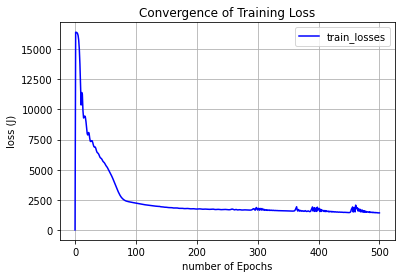

In [57]:
device = torch.device('cuda')  

model.to(device)
optimizer= optim.Adam(model.parameters(), lr=1e-2)  

train_X = train_X.to(device)
val_X = val_X.to(device)
train_Y = train_Y.to(device)
val_Y = val_Y.to(device)

training_loop(
    n_epochs=500,
    optimizer= optimizer,
    model=model,
    loss_fn=nn.MSELoss(),
    train_X=train_X,
    val_X= val_X,
    train_Y= train_Y,
    val_Y= val_Y)

In [58]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "Bus_arrival_time_prediction_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models/Bus_arrival_time_prediction_model.pth


In [59]:
loaded_model = model
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loss_fn = nn.MSELoss()

In [61]:
loaded_model.eval()
test_X=val_X[:]
test_Y=val_Y[:]
n=test_X.shape[0]

with torch.no_grad():
    start=time.time()
    loaded_model_preds = loaded_model(test_X)
    test_MSE = loss_fn(loaded_model_preds, test_Y)
    test_RMSE=math.sqrt(test_MSE)
    print("test_RMSE", test_RMSE)


test_RMSE 37.58719192850555
